![](https://www.kdnuggets.com/images/sentiment-fig-1-689.jpg)

* Sentiment analysis :- Sentiment analysis help to get wider public opinion that used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers allows brands to learn what makes customers happy or frustrated

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/twitter-airline-sentiment/Tweets.csv
/kaggle/input/twitter-airline-sentiment/database.sqlite


In [31]:
data=pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')

In [32]:
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


# *null value in percentage*

In [33]:
data.isnull().sum() * 100 / len(data)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [34]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [35]:
data.shape

(14640, 15)

# EDA OF THE data sets

HERe check about the airline sentiment about the user 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

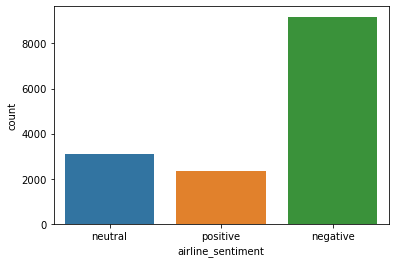

In [36]:
print(data['airline_sentiment'].value_counts())
sns.countplot(data['airline_sentiment'])

# Total no of tweet for each airline

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


<AxesSubplot:xlabel='airline', ylabel='count'>

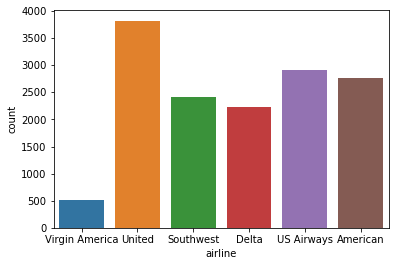

In [37]:
print(data.airline.value_counts())
sns.countplot(data['airline'])

united airways get more tweet
virgin America get the least tweet

In [38]:
#remove unwanted column from the data 
del data['airline_sentiment_gold']
del data['negativereason_gold']
del data['tweet_coord']

# Here we check airline sentiment for each airline

negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64 US Airways
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64 United
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64 American
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64 Southwest
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64 Delta
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64 Virgin America


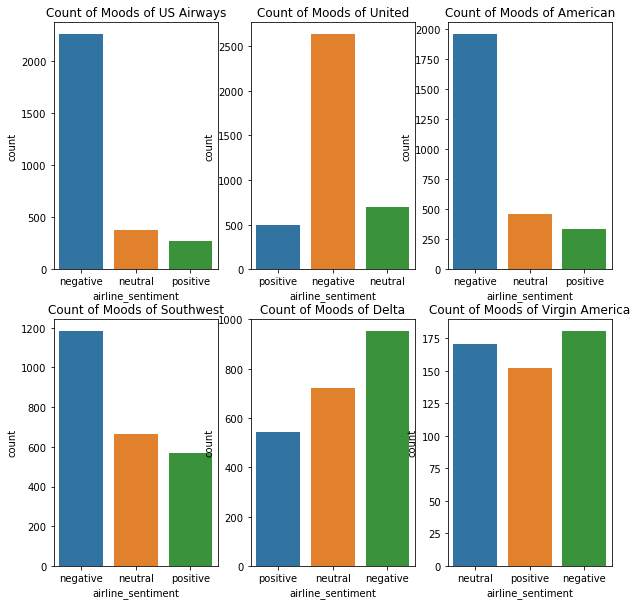

In [39]:
#calculate no of sentiment for each airline 
plt.figure(1,figsize=(10,10))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_value=data[data['airline']==i]
    print(new_value['airline_sentiment'].value_counts(),i)
    Index = [1,2,3]
    sns.countplot(new_value['airline_sentiment'])
    plt.title('Count of Moods of '+i)

**Data show that the when customer get not good Service from the airline then tweet about it the wrtite less twee when get good service from the airline**

**United, US Airways, American substantially get negative reactions.
Tweets for Virgin America are the most balanced.
**

# Clean the text data and then we check most postive and most negative comment on the text data

In [40]:
#install library of nltk to  clean the text data
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Word cloud:-visual representation of the text data They are very popular because they help us easily spot the most frequently occurring words. The more frequent the word is used, the larger and bolder it is displayed. That the help to tackel the main problem ***

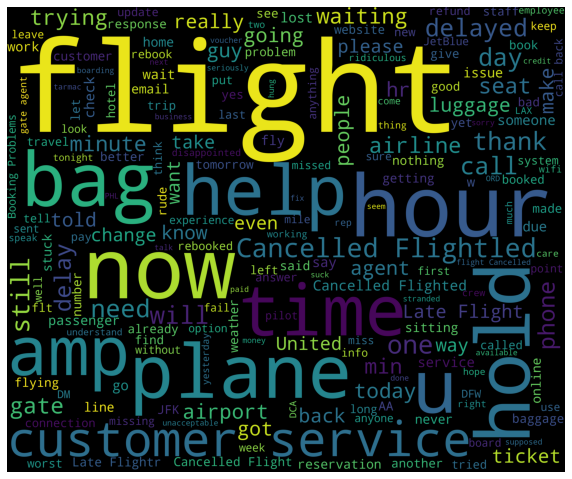

In [41]:
new_data=data[data['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

*postive sentiment about the airline* 

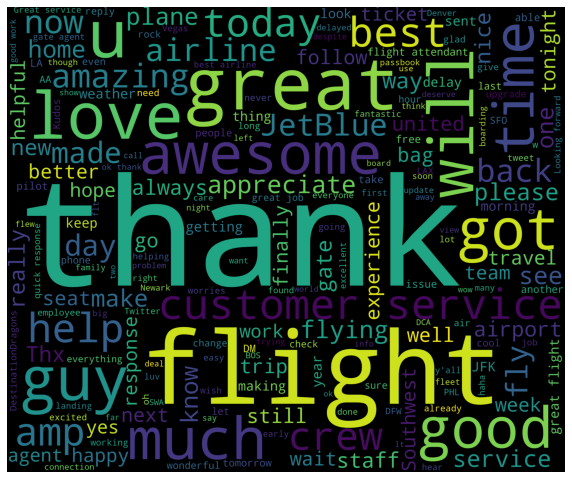

In [42]:
new_data=data[data['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

*Neutral sentiment about the airline*

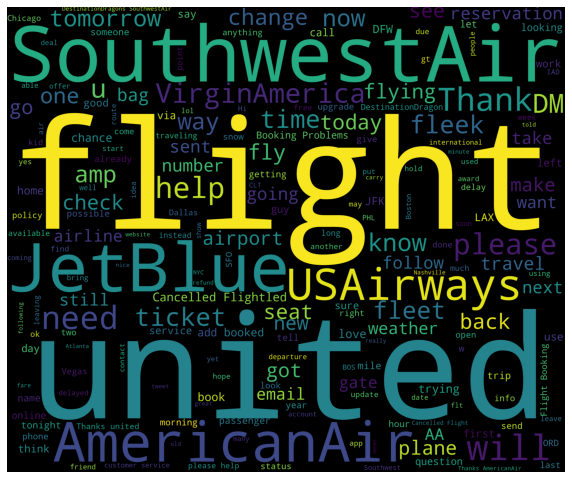

In [43]:
neutral_text=data[data['airline_sentiment']=='neutral']
words=''.join(neutral_text['text'])
cleaned_word=' '.join([word for word in words.split()
                      if 'http' not in word
                       and not word.startswith('@')
                        and word!='RT'])
wordcloud=WordCloud(stopwords=STOPWORDS,
                    background_color='black',
                      width=3000,
                      height=2500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Percentage of the negative reason***

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


<AxesSubplot:xlabel='negativereason', ylabel='count'>

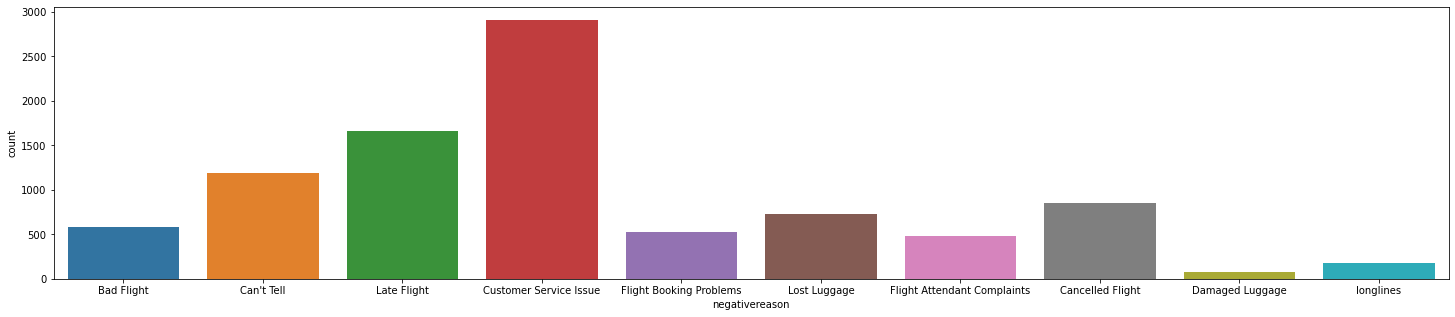

In [44]:
print(data.negativereason.value_counts())
plt.figure(figsize=(25,5))
sns.countplot(data.negativereason)

***Neagative reason by airline that the get type of reviews gave by the customer***

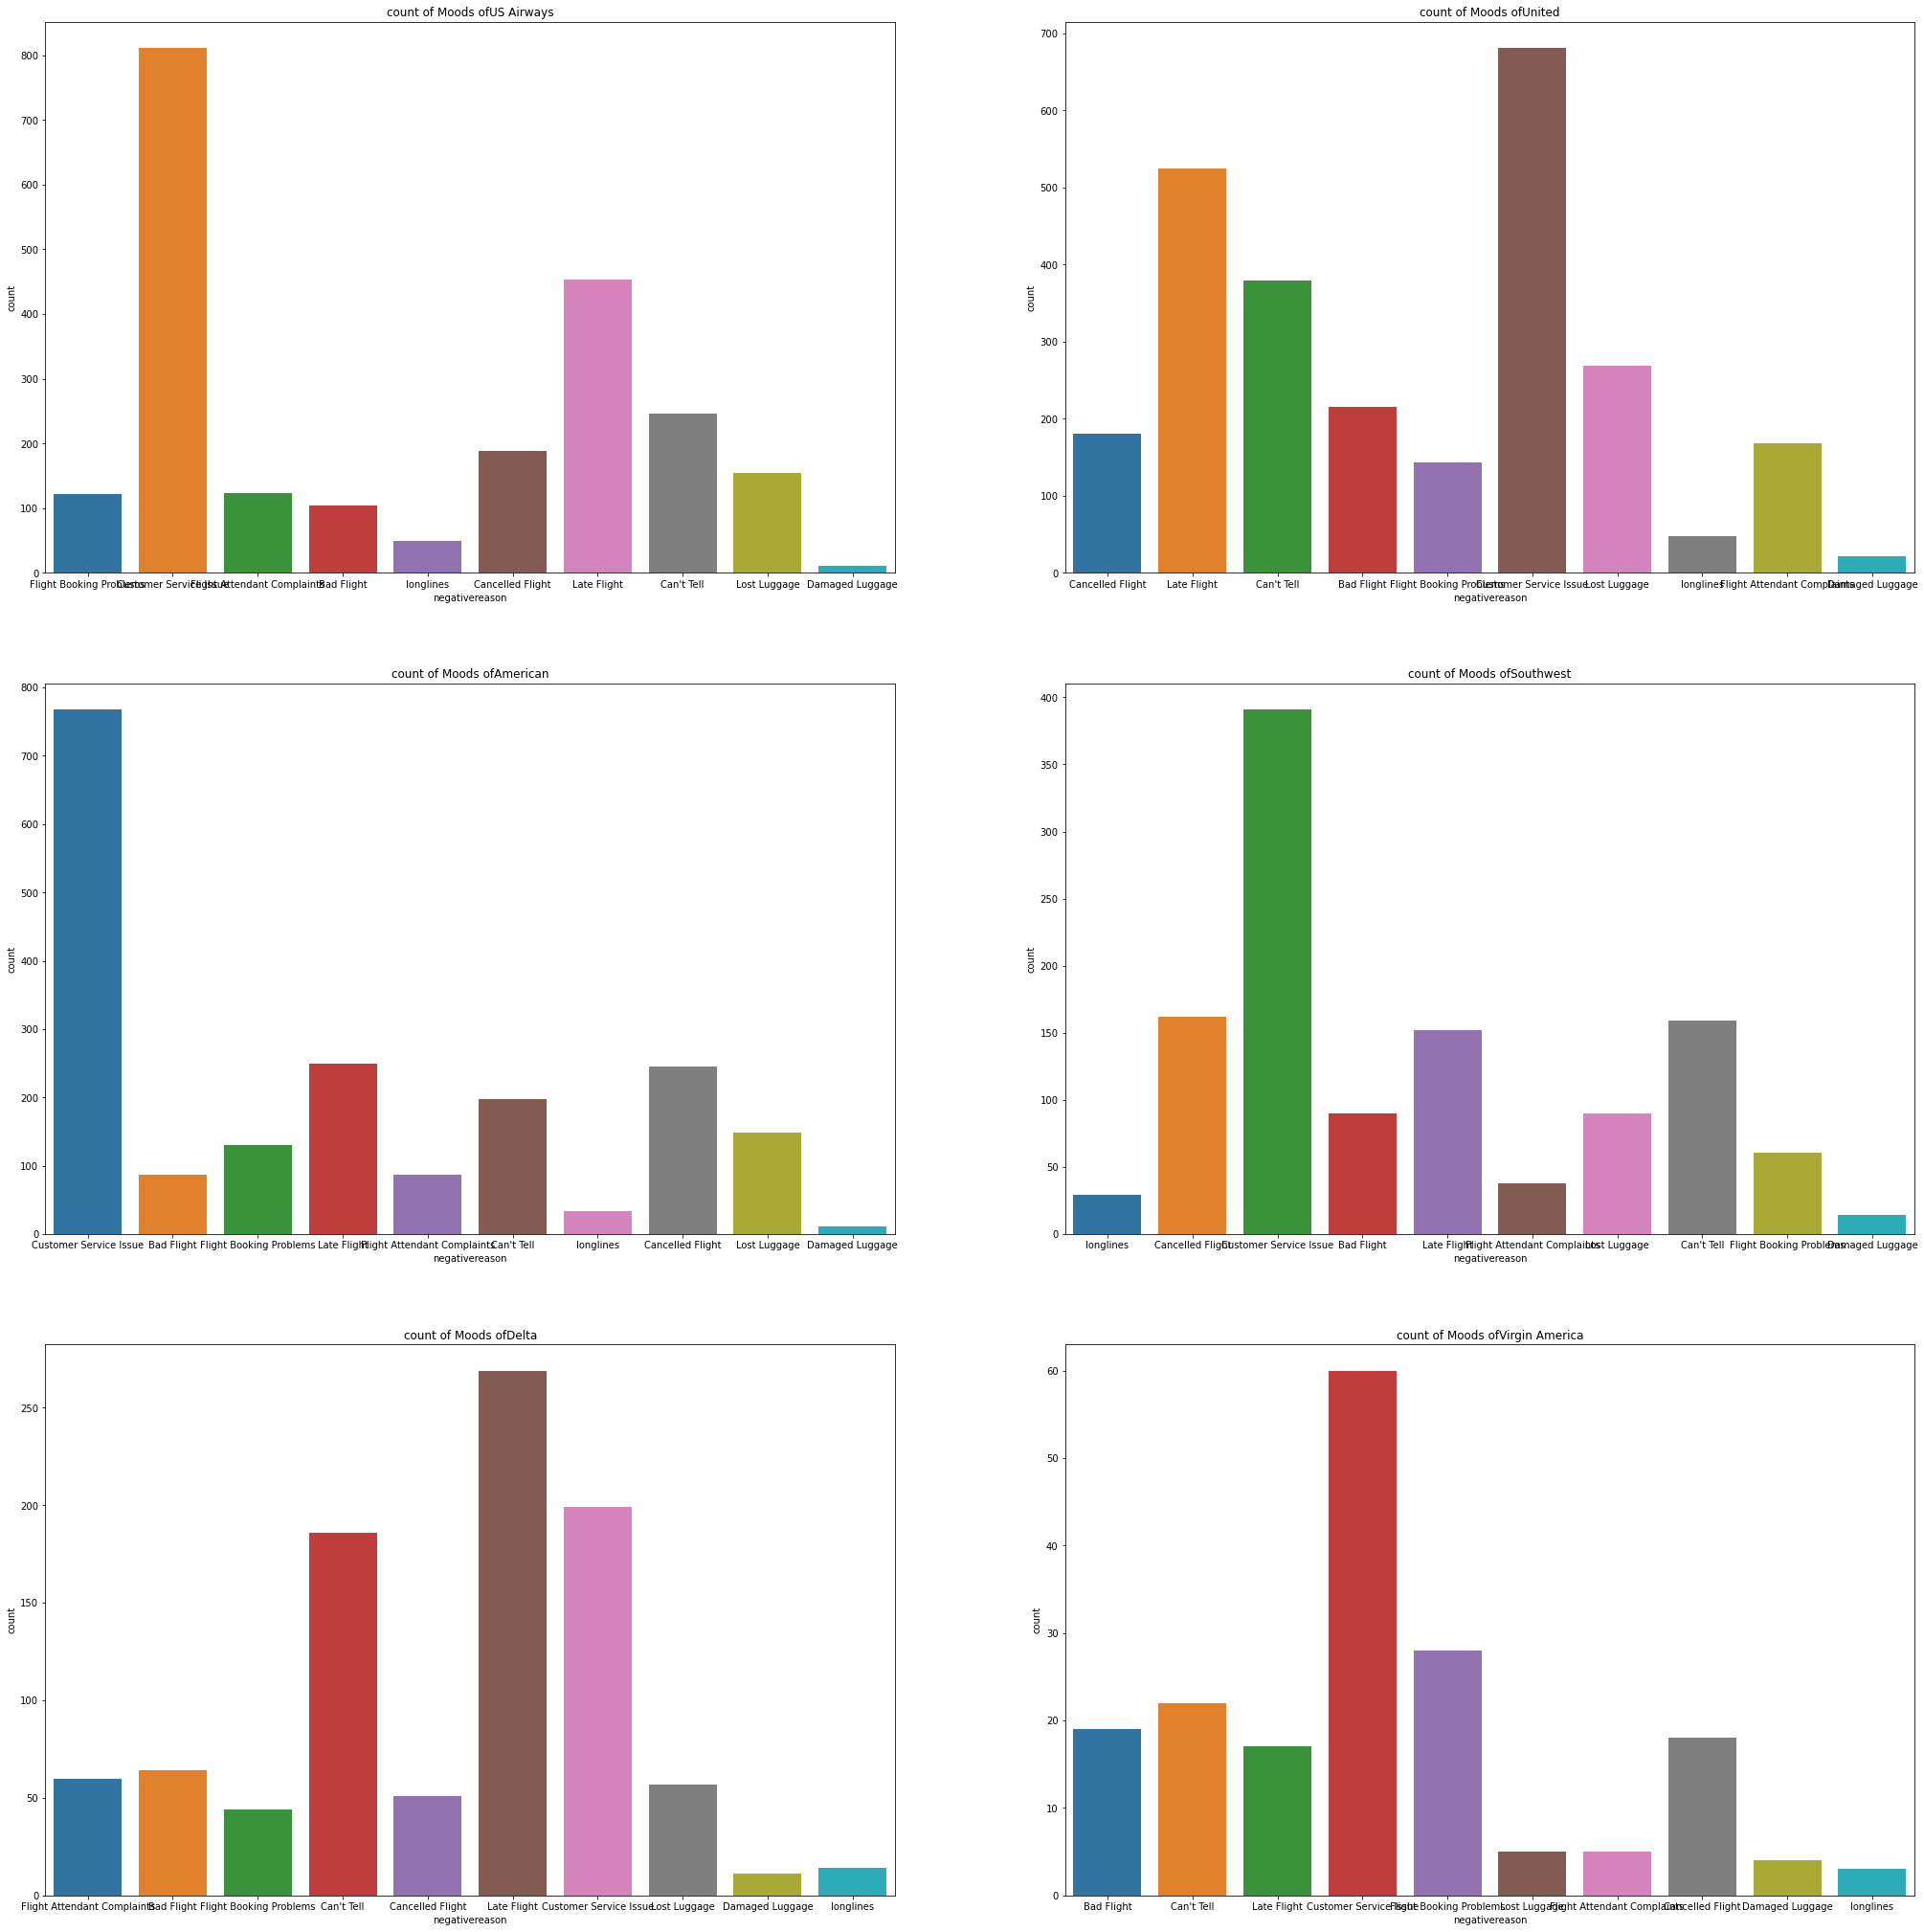

In [45]:
plt.figure(1,figsize=(35,36))
airline=['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airline:
    indices=airline.index(i)
    plt.subplot(3,2,indices+1)
    new_values=data[data['airline']==i]
    Index=[1,2,3,4,5,6,7,8,9,10]
    sns.countplot(new_values['negativereason'])
    plt.title('count of Moods of'+i)

***Data processing technique remove noise from the text data ***
**Different text processing techniques:**
**Tokenization:-separating a piece of text into smaller units the are bascilly called the tokens Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms**

In [46]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [47]:
def preprocess(x,stem=False):
    x=re.sub(text_cleaning_re,'  ',str(x).lower()).strip()
    tokens=[]
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
        return '  '.join(tokens)
data.text=data.text.apply(lambda x:preprocess(x))

*postive and neutrl sentiment aree coherent with each other thats why we using label encoding technique 1 denote postive and negative sentiment convert to the 0*

In [48]:
data['sentiment']=data['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [49]:
print(data.sentiment.value_counts())

0    9178
1    5462
Name: sentiment, dtype: int64


In [50]:
y=data.sentiment

***machine can never stand the word thats why we convert word to vector that help to easy undderstand to the machine differnet type of vectorizaion technique used in ml .
TF-IDF are sparse vectors where the number of non-zero values in the vector is equal to the number of unique words in the document***
![](https://miro.medium.com/max/1838/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X= vectorizer.fit_transform(data.text)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

**using simple ml model to predict the sentiment of the user**


***Logistic regression :-logistic regression basscially used in the sigmoid function that help to the where the user stasfied or not***

In [53]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [54]:
score = model.score(X_test, y_test)
score

0.7930327868852459

***That’s the way to calculate the Shapley value: It is the average of the marginal contributions across all permutations theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).***

In [56]:
import shap
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions

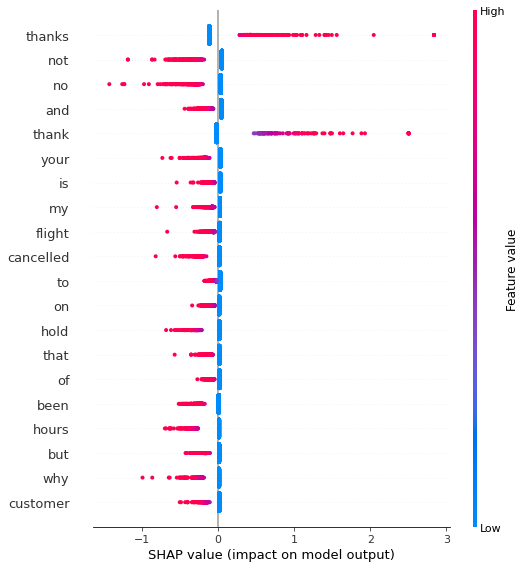

In [57]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1870
           1       0.88      0.50      0.63      1058

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928



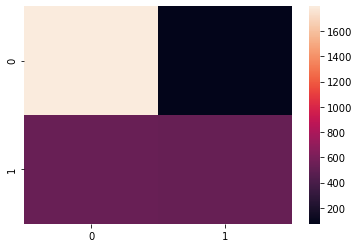

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Random Forest:-The Random Forest  classifiers are suitable for dealing with the high dimensional noisy data in text classification

In [64]:
from sklearn.ensemble import RandomForestClassifier
models=RandomForestClassifier()
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [65]:
score = model.score(X_test, y_test)
score

0.7930327868852459

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1870
           1       0.88      0.50      0.63      1058

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928



<AxesSubplot:>

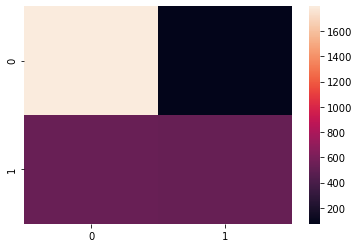

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))

**SVC:-is an algorithm that determines the best decision boundary between vectors that belong to a given group (or category) and vectors that do not belong to it.**

In [68]:
from sklearn.svm import SVC
svm=SVC()
svm=SVC(kernel="rbf", C=0.025, probability=True)

In [69]:
svm.fit(X_train,y_train)

SVC(C=0.025, probability=True)

In [70]:
score = model.score(X_test, y_test)
score

0.7930327868852459

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1870
           1       0.88      0.50      0.63      1058

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928



<AxesSubplot:>

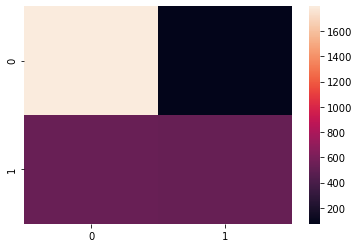

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))

**ANY FEEDBACK IN THE COMMENTS WILL BE HIGHLY APPRECIATED**